# PRIMERA PARTE

Seaborn es una biblioteca de visualización de datos basada en Matplotlib que proporciona una interfaz de alto nivel para crear gráficos estadísticos.

In [1]:
import seaborn as sns                               #importa la biblioteca seaborn y la asigna al alias sns.
df = sns.load_dataset('titanic')                    #carga el conjunto de datos titanic de seaborn en un DataFrame llamado df.
nan = df['deck'].value_counts(dropna=False)         #cuenta los valores en la columna deck (incluyendo los valores faltantes NaN)
print(nan)

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64


In [2]:
import pandas as pd

# Guardar el dataset como un archivo CSV
df.to_csv('titanic.csv', index=False)

In [3]:
import os
print(os.getcwd())  # Muestra el directorio de trabajo actual

/content


In [5]:
elim=df.dropna(axis=1,thresh=500)  #elimina la columna
print(elim)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male  embark_town alive  alone  


In [6]:
print(elim.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [8]:
nan = df['age'].value_counts(dropna=False)         #cuenta los valores en la columna age (incluyendo los valores faltantes NaN)
print(nan)

age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64


In [7]:
agelim=df.dropna(subset=['age'],how='any',axis=0)     #es un método que elimina las filas que contienen valores nulos (NaN) en las columnas especificadas.
                                                      # how= 'any': significa que se eliminará la fila si cualquiera de los valores en las columnas del subset (en este caso solo 'age') es NaN.
print(len(agelim))

714


In [10]:
c=891-177
print(c)

714


In [12]:
mean_age=df['age'].mean(axis=0)             #axis=0 en este caso no es necesario, ya que por defecto mean() opera sobre las columnas (a lo largo de las filas) en pandas.
df['age'].fillna(mean_age,inplace=True)     #reemplaza los valores NaN (nulos) en la columna 'age'
                                            # significa que la operación se realiza directamente sobre el DataFrame original df (sin crear una copia).
print(df['age'].head(10))

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


<ipython-input-12-61d7559b7398>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(mean_age,inplace=True)


# SEGUNDA PARTE

In [15]:
data=pd.DataFrame({'c1':['a','a' , 'b' , 'a' , 'b' ] ,'c2' : [1, 1, 1, 2,2],'c3' : [1,1,2,2,2]})
print(data)


  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


In [17]:
data2=data.duplicated()  #es decir, si ya existe una fila idéntica antes en el DataFrame
print(data2)

0    False
1     True
2    False
3    False
4    False
dtype: bool


In [19]:
data3=data.drop_duplicates()  #elimina duplicados
print(data3)

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


# PARTE 3

```
# Tiene formato de código
```



In [33]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# metadata
print(car_evaluation.metadata)

# variable information
print(car_evaluation.variables)

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [36]:
print(X)
print(y)

     buying  maint  doors persons lug_boot safety
0     vhigh  vhigh      2       2    small    low
1     vhigh  vhigh      2       2    small    med
2     vhigh  vhigh      2       2    small   high
3     vhigh  vhigh      2       2      med    low
4     vhigh  vhigh      2       2      med    med
...     ...    ...    ...     ...      ...    ...
1723    low    low  5more    more      med    med
1724    low    low  5more    more      med   high
1725    low    low  5more    more      big    low
1726    low    low  5more    more      big    med
1727    low    low  5more    more      big   high

[1728 rows x 6 columns]
      class
0     unacc
1     unacc
2     unacc
3     unacc
4     unacc
...     ...
1723   good
1724  vgood
1725  unacc
1726   good
1727  vgood

[1728 rows x 1 columns]


# PARTE 4


In [40]:
import numpy as np

# Crear una base de datos ficticia con valores para la columna 'horsepower'
np.random.seed(42)                                        # Para reproducibilidad
horsepower_values = np.random.randint(50, 300, size=100)  # Valores entre 50 y 300, para 100 coches

# Crear un DataFrame con la columna 'horsepower'
df = pd.DataFrame({'horsepower': horsepower_values})

# Definir los límites de los intervalos para la variable 'horsepower'
bin_dividers = [50, 100, 150, 200, 250, 300]                        # Definir los cortes
bin_names = ['50-100', '101-150', '151-200', '201-250', '251-300']  # Nombres para los intervalos



In [47]:
# Código en la primera celda (In [13])
df['hp_bin'] = pd.cut(x=df['horsepower'],  #divide la columna horsepower en intervalos definidos por bin_dividers
                      bins=bin_dividers,
                      labels=bin_names,
                      include_lowest=True)  #Asegura que el primer intervalo incluya el valor más bajo

print(df[['horsepower','hp_bin']].head(15))



    horsepower   hp_bin
0          152  151-200
1          229  201-250
2          142  101-150
3           64   50-100
4          156  151-200
5          121  101-150
6          238  201-250
7           70   50-100
8          152  151-200
9          171  151-200
10         260  251-300
11         264  251-300
12         124  101-150
13         252  251-300
14         137  101-150


In [54]:
horsepower_dummies = pd.get_dummies(df['hp_bin'])
#toma una columna categórica y crea columnas separadas para cada categoría.
#Cada columna será una variable binaria: true false

print(df[['horsepower']].head(25).join(horsepower_dummies.head(25)))

    horsepower  50-100  101-150  151-200  201-250  251-300
0          152   False    False     True    False    False
1          229   False    False    False     True    False
2          142   False     True    False    False    False
3           64    True    False    False    False    False
4          156   False    False     True    False    False
5          121   False     True    False    False    False
6          238   False    False    False     True    False
7           70    True    False    False    False    False
8          152   False    False     True    False    False
9          171   False    False     True    False    False
10         260   False    False    False    False     True
11         264   False    False    False    False     True
12         124   False     True    False    False    False
13         252   False    False    False    False     True
14         137   False     True    False    False    False
15         166   False    False     True    False    Fal

In [57]:
horsepower_dummies2 = pd.get_dummies(df['hp_bin']).astype(int)
print(df[['horsepower']].head(25).join(horsepower_dummies2.head(25)))

    horsepower  50-100  101-150  151-200  201-250  251-300
0          152       0        0        1        0        0
1          229       0        0        0        1        0
2          142       0        1        0        0        0
3           64       1        0        0        0        0
4          156       0        0        1        0        0
5          121       0        1        0        0        0
6          238       0        0        0        1        0
7           70       1        0        0        0        0
8          152       0        0        1        0        0
9          171       0        0        1        0        0
10         260       0        0        0        0        1
11         264       0        0        0        0        1
12         124       0        1        0        0        0
13         252       0        0        0        0        1
14         137       0        1        0        0        0
15         166       0        0        1        0       

In [60]:
# Código en la tercera celda (In [15])
print(df.horsepower.describe())
print('\n')


count    100.000000
mean       0.479919
std        0.288851
min        0.000000
25%        0.222782
50%        0.451613
75%        0.750000
max        1.000000
Name: horsepower, dtype: float64




In [59]:
# Calcular la normalización paso a paso
min_value = df.horsepower.min()  # Valor mínimo original
max_value = df.horsepower.max()  # Valor máximo original
min_x = df.horsepower - min_value  # Desplazar los valores
min_max = max_value - min_value  # Calcular la diferencia entre el máximo y el mínimo

# Imprimir los resultados intermedios
print("Valor mínimo de 'horsepower':", min_value)
print("Valor máximo de 'horsepower':", max_value)
print("Desplazando 'horsepower' para que el mínimo sea 0 (min_x):")
print(min_x.head())
print("\n")
print("Valor máximo menos valor mínimo de 'horsepower' (min_max):", min_max)

# Normalizar la columna 'horsepower'
df.horsepower = min_x / min_max

# Imprimir los primeros valores de 'horsepower' después de la normalización
print("\nPrimeros valores de 'horsepower' después de la normalización:")
print(df.horsepower.head())
print('\n')

# Imprimir las estadísticas de 'horsepower' después de la normalización
print("Estadísticas de 'horsepower' después de la normalización:")
print(df.horsepower.describe())

Valor mínimo de 'horsepower': 51
Valor máximo de 'horsepower': 299
Desplazando 'horsepower' para que el mínimo sea 0 (min_x):
0    101
1    178
2     91
3     13
4    105
Name: horsepower, dtype: int64


Valor máximo menos valor mínimo de 'horsepower' (min_max): 248

Primeros valores de 'horsepower' después de la normalización:
0    0.407258
1    0.717742
2    0.366935
3    0.052419
4    0.423387
Name: horsepower, dtype: float64


Estadísticas de 'horsepower' después de la normalización:
count    100.000000
mean       0.479919
std        0.288851
min        0.000000
25%        0.222782
50%        0.451613
75%        0.750000
max        1.000000
Name: horsepower, dtype: float64


# Coding Practice #0110

### 1. Matplotlib visualization with objects:

In [5]:
# Importa la librería matplotlib para visualización de gráficos
import matplotlib.pyplot as plt

# Importa numpy para realizar operaciones numéricas y generar arrays
import numpy as np

#### 1.1. Visualization with figure object:

In [11]:
# Genera 100 valores igualmente distribuidos entre 0 y 10
x = np.linspace(0, 10, 100)

# Calcula el seno de cada valor en 'x'
y = np.sin(x)

# Calcula el coseno de cada valor en 'x'
z = np.cos(x)

In [12]:
# Crear un DataFrame de pandas para mostrar los valores como columnas
df = pd.DataFrame({
    'x': x,
    'sin(x)': y,
    'cos(x)': z
})

# Imprimir las primeras filas del DataFrame
print(df.head(25))  # Cambia el número si quieres ver más o menos filas

           x    sin(x)    cos(x)
0   0.000000  0.000000  1.000000
1   0.101010  0.100838  0.994903
2   0.202020  0.200649  0.979663
3   0.303030  0.298414  0.954437
4   0.404040  0.393137  0.919480
5   0.505051  0.483852  0.875150
6   0.606061  0.569634  0.821898
7   0.707071  0.649610  0.760268
8   0.808081  0.722963  0.690887
9   0.909091  0.788945  0.614463
10  1.010101  0.846886  0.531775
11  1.111111  0.896192  0.443666
12  1.212121  0.936363  0.351034
13  1.313131  0.966988  0.254823
14  1.414141  0.987755  0.156015
15  1.515152  0.998452  0.055616
16  1.616162  0.998971 -0.045350
17  1.717172  0.989306 -0.145853
18  1.818182  0.969556 -0.244870
19  1.919192  0.939922 -0.341390
20  2.020202  0.900705 -0.434430
21  2.121212  0.852307 -0.523042
22  2.222222  0.795220 -0.606321
23  2.323232  0.730026 -0.683419
24  2.424242  0.657390 -0.753550


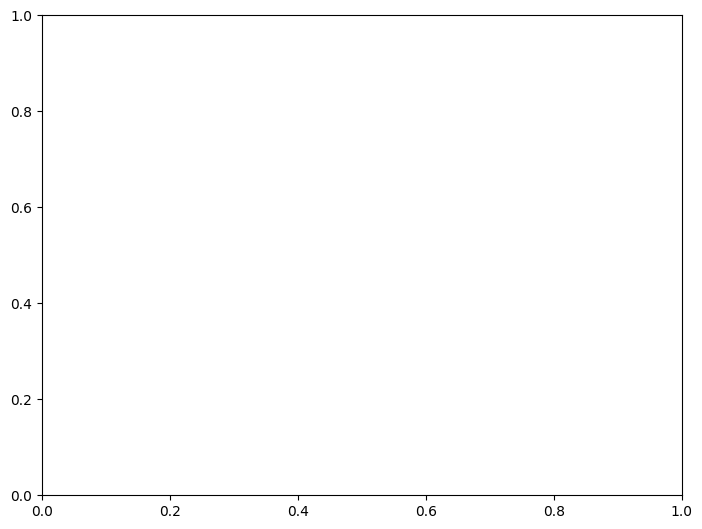

In [79]:
# Crear una nueva figura para el gráfico
fig0 = plt.figure()

# Añadir un conjunto de ejes a la figura, donde [0,0,1,1] es la posición del gráfico
# en el contenedor (izquierda, abajo, ancho, alto). Esto indica que el gráfico
# ocupará todo el espacio disponible en la figura.
axes0 = fig0.add_axes([0, 0, 1, 1])


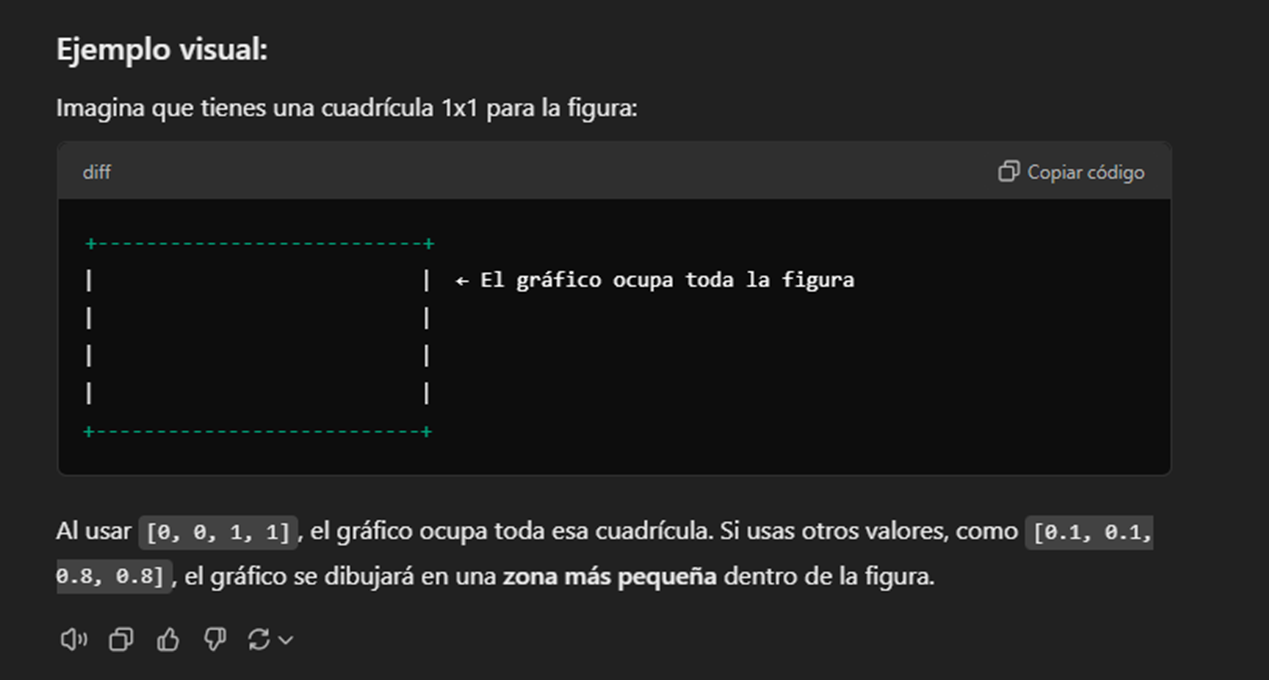

NameError: name 'x' is not defined

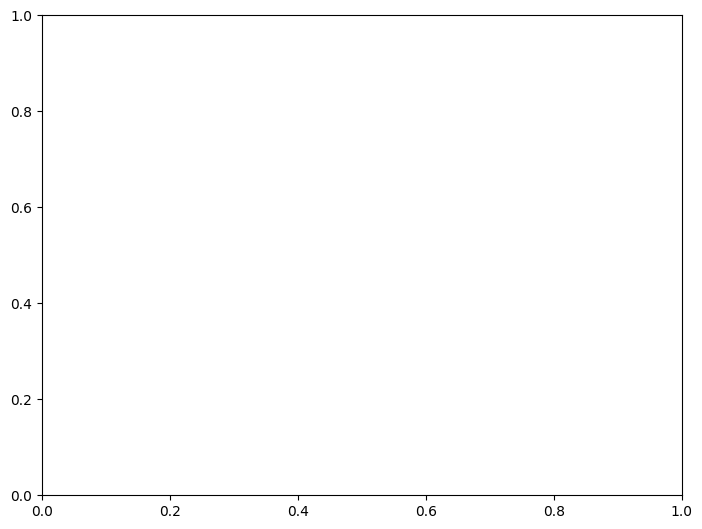

In [9]:
# Crear una nueva figura para el gráfico
fig0 = plt.figure()

# Añadir un conjunto de ejes a la figura, donde [0,0,1,1] es la posición del gráfico
# en el contenedor (izquierda, abajo, ancho, alto). Esto indica que el gráfico
# ocupará todo el espacio disponible en la figura.
axes0 = fig0.add_axes([0, 0, 1, 1])

# Graficar la función y=sin(x) en el gráfico con color rojo y línea continua
axes0.plot(x, y, color='red', linestyle='-')

# Añadir etiqueta al eje X
axes0.set_xlabel('X')

# Añadir etiqueta al eje Y
axes0.set_ylabel('Y')

# Añadir un título al gráfico
axes0.set_title('LINE PLOT')

# Mostrar el gráfico
plt.show()

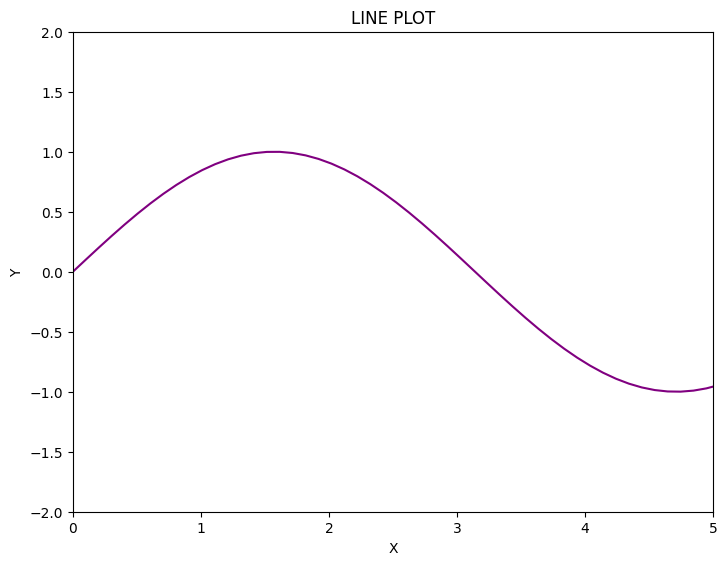

In [64]:
fig0=plt.figure()
axes0 = fig0.add_axes([0,0,1,1])
axes0.plot(x,y,color='purple',linestyle='-')
axes0.set_xlabel('X')
axes0.set_ylabel('Y')
axes0.set_title('LINE PLOT')
axes0.set_xlim([0,5])                        # Horizontal axis limits.
axes0.set_ylim([-2,2])                       # Vertical axis limits.
plt.show()

Specify the width and height with 'figsize' argument:

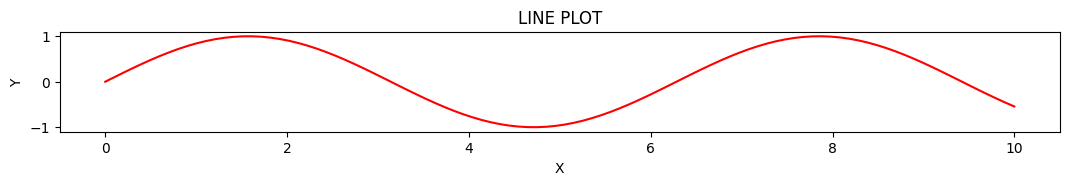

In [65]:
fig0=plt.figure(figsize=(10,1))              # Width and height specified with figsize.
axes0 = fig0.add_axes([0,0,1,1])             # Left, bottom, width, height.
axes0.plot(x,y,color='red',linestyle='-')
axes0.set_xlabel('X')
axes0.set_ylabel('Y')
axes0.set_title('LINE PLOT')
plt.show()

#### 1.2. Multiple plots within the same axes:

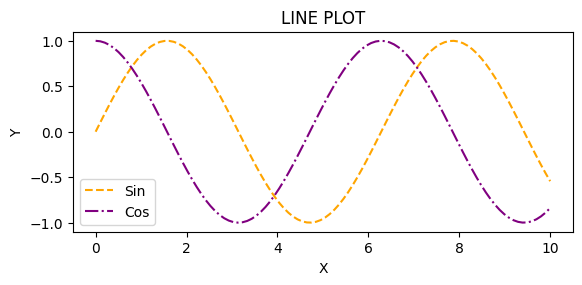

In [66]:
fig0=plt.figure(figsize=(5,2), dpi=100)      # Cuanto mayor sea el valor de dpi, mayor será la resolución de la figura.
axes0 = fig0.add_axes([0,0,1,1])             # Left, bottom, width, height.
axes0.plot(x,y,color='orange',linestyle='--', label='Sin')           # 'label' for the legend.
axes0.plot(x,z,color='purple',linestyle='-.', label='Cos')        # 'label' for the legend.
axes0.legend(loc=0)                                             # ubique la leyenda en la mejor posición disponible para evitar que se sobreponga con los datos del gráfico.
axes0.set_xlabel('X')
axes0.set_ylabel('Y')
axes0.set_title('LINE PLOT')
plt.show()

Output to an external file:

In [83]:
fig0.savefig('my_fig_01.png')

#### 1.3. Multiple plots in separate axes:

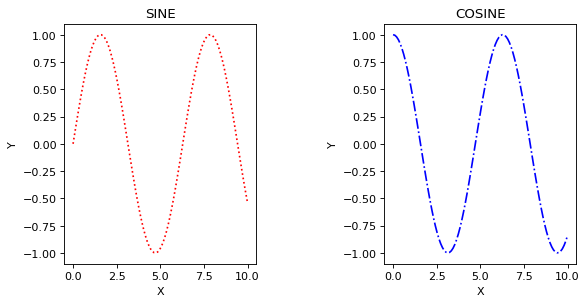

In [84]:
fig0=plt.figure(figsize=(8,3), dpi=80)       #Cuanto mayor sea el valor de dpi, mayor será la resolución de la figura.
axes1 = fig0.add_axes([0,0,0.3,1])            # Left, bottom, width, height.
axes2 = fig0.add_axes([0.5,0,0.3,1])          # Left, bottom, width, height.
axes1.plot(x,y,color='red',linestyle=':')
axes2.plot(x,z,color='blue',linestyle='-.')
axes1.set_xlabel('X')
axes1.set_ylabel('Y')
axes1.set_title('SINE')
axes2.set_xlabel('X')
axes2.set_ylabel('Y')
axes2.set_title('COSINE')
plt.show()

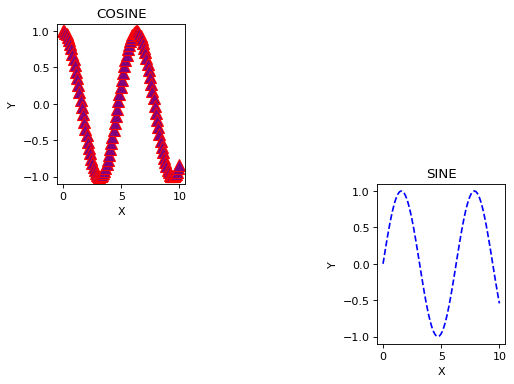

In [15]:
# Crear una nueva figura con un tamaño de 8x4 pulgadas y una resolución de 80 dpi
fig0 = plt.figure(figsize=(8, 4), dpi=80)  # Cuanto mayor sea el valor de dpi, mayor será la resolución de la figura.

# Crear dos conjuntos de ejes dentro de la figura (posicionando cada uno con [izquierda, abajo, ancho, alto])
# El primer gráfico ocupa la parte superior izquierda, con un ancho de 20% y alto de 50% de la figura.
axes1 = fig0.add_axes([0, 0.5, 0.2, 0.5])  # Left, bottom, width, height.

# El segundo gráfico ocupa la parte inferior derecha, con un ancho de 20% y alto de 50% de la figura.
axes2 = fig0.add_axes([0.5, 0, 0.2, 0.5])  # Left, bottom, width, height.

# Graficar el coseno (en el gráfico de axes1) con marcadores de triángulo hacia arriba (^) de color púrpura
# y borde rojo. El parámetro alpha=0.5 hace que el gráfico tenga un 50% de transparencia.
axes1.plot(x, z, linestyle='none', marker='^', markersize=10, markerfacecolor='purple', markeredgecolor='red')

# Graficar el seno (en el gráfico de axes2) con una línea azul discontinua (--).
axes2.plot(x, y, color='blue', linestyle='--')

# Añadir etiquetas y títulos a los ejes de cada gráfico
axes1.set_xlabel('X')  # Etiqueta para el eje X del gráfico de coseno
axes1.set_ylabel('Y')  # Etiqueta para el eje Y del gráfico de coseno
axes1.set_title('COSINE')  # Título para el gráfico de coseno

axes2.set_xlabel('X')  # Etiqueta para el eje X del gráfico de seno
axes2.set_ylabel('Y')  # Etiqueta para el eje Y del gráfico de seno
axes2.set_title('SINE')  # Título para el gráfico de seno

# Mostrar el gráfico
plt.show()

#### 1.4. Multiple plots in an array of axes:

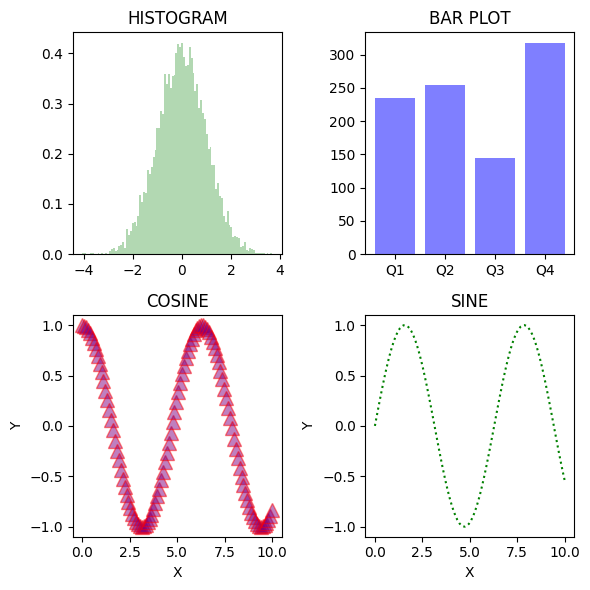

In [13]:
# Crear una figura con 2 filas y 2 columnas de subgráficos, tamaño 6x6 pulgadas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

# (0,0) - Gráfico 1: Histograma
c = np.random.randn(10000)  # Generar 10,000 números aleatorios con distribución normal
axes[0, 0].hist(c, bins=100, color='green', density=True, alpha=0.3)  # Histograma
axes[0, 0].set_title('HISTOGRAM')  # Título del gráfico

# (1,0) - Gráfico 2: Gráfico de dispersión (coseno)
axes[1, 0].plot(x, z, linestyle='none', marker='^', markersize=10, markerfacecolor='purple', markeredgecolor='red', alpha=0.5)
axes[1, 0].set_xlabel('X')  # Etiqueta eje X
axes[1, 0].set_ylabel('Y')  # Etiqueta eje Y
axes[1, 0].set_title('COSINE')  # Título del gráfico

# (0,1) - Gráfico 3: Gráfico de barras
a = np.array(['Q1', 'Q2', 'Q3', 'Q4'])  # Categorías de las barras
b = np.array([234.0, 254.7, 144.6, 317.6])  # Valores de las barras
axes[0, 1].bar(a, b, color='blue', alpha=0.5)  # Graficar barras
axes[0, 1].set_title('BAR PLOT')  # Título del gráfico

# (1,1) - Gráfico 4: Gráfico de línea (seno)
axes[1, 1].plot(x, y, color='green', linestyle=':')  # Línea verde discontinua
axes[1, 1].set_xlabel('X')  # Etiqueta eje X
axes[1, 1].set_ylabel('Y')  # Etiqueta eje Y
axes[1, 1].set_title('SINE')  # Título del gráfico

# Ajustar la disposición de los subgráficos para evitar que se sobrepongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

Output to an external file:

In [88]:
fig.savefig('my_fig_02.png')